In [1297]:
import pandas as pd
import numpy as np

def load_csv(route):
    data = pd.read_csv(route)
    data = data[data.columns[1:]]
    data["Time stamp"] = data["Time stamp"].astype(int)
    data = data.set_index(data["File name"] + data["Time stamp"].astype(str))
    return data

In [1298]:
basic = load_csv("/Users/harmonialeo/Downloads/basic/summarise.csv")
taf = load_csv("/Users/harmonialeo/Downloads/taf_se_quantiled/summarise.csv")
taf_minmax = load_csv("/Users/harmonialeo/Downloads/taf_se_minmax/summarise.csv")
taf_quantiled = load_csv("/Users/harmonialeo/Downloads/taf_quantiled/summarise.csv")
den_train = load_csv("/Users/harmonialeo/Downloads/gen2_train_density2.csv")
den_val = load_csv("/Users/harmonialeo/Downloads/gen2_val_density2.csv")
den_test = load_csv("/Users/harmonialeo/Downloads/gen2_test_density2.csv")
rps_time = load_csv("/Users/harmonialeo/Downloads/gen2_generate_time.csv")

In [1299]:
test_result = taf.append(basic).append(taf_minmax).append(taf_quantiled).merge(rps_time,left_index=True,right_index=True).merge(den_test,left_index=True,right_index=True)

In [1300]:
test_result.head()

,Exp name,File name_x,Time stamp_x,Map,Map 50,Map 75,Map small,Map medium,Map large,Infer time,...,Generate taf time,File name,Time stamp,Density,Density negative,Density positive,Density effective,Density ineffective,Density effective max,Density effective min
17-04-04_11-00-13_cut_15_122500000_18250000010099999,taf_se_quantiled_best,17-04-04_11-00-13_cut_15_122500000_182500000,10099999,0.0,0.0,0.0,0.0,0.0,-1.0,0.009973,...,0.001411,17-04-04_11-00-13_cut_15_122500000_182500000,10099999,0.001220,0.001557,0.000883,0.001900,0.001198,0.001947,0.001795
17-04-04_11-00-13_cut_15_122500000_18250000010099999,basic_newlr,17-04-04_11-00-13_cut_15_122500000_182500000,10099999,0.0,0.0,0.0,0.0,0.0,-1.0,0.008063,...,0.001411,17-04-04_11-00-13_cut_15_122500000_182500000,10099999,0.001220,0.001557,0.000883,0.001900,0.001198,0.001947,0.001795
17-04-04_11-00-13_cut_15_122500000_18250000010099999,taf_se_minmax,17-04-04_11-00-13_cut_15_122500000_182500000,10099999,0.0,0.0,0.0,0.0,0.0,-1.0,0.009408,...,0.001411,17-04-04_11-00-13_cut_15_122500000_182500000,10099999,0.001220,0.001557,0.000883,0.001900,0.001198,0.001947,0.001795
17-04-04_11-00-13_cut_15_122500000_18250000010099999,taf_newlr,17-04-04_11-00-13_cut_15_122500000_182500000,10099999,0.0,0.0,0.0,0.0,0.0,-1.0,0.010845,...,0.001411,17-04-04_11-00-13_cut_15_122500000_182500000,10099999,0.001220,0.001557,0.000883,0.001900,0.001198,0.001947,0.001795
17-04-04_11-00-13_cut_15_122500000_18250000010599999,taf_se_quantiled_best,17-04-04_11-00-13_cut_15_122500000_182500000,10599999,0.0,0.0,0.0,0.0,0.0,-1.0,0.015354,...,0.001397,17-04-04_11-00-13_cut_15_122500000_182500000,10599999,0.000188,0.000230,0.000145,0.000173,0.000188,0.000208,0.000000


In [1301]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [1302]:
test_result["Run time"] = np.where(test_result["Exp name"] == "basic_newlr", test_result["Infer time"] + test_result["Generate volume time"], test_result["Infer time"] + test_result["Generate taf time"])

In [1303]:
basic_Run_time = test_result["Run time"][test_result["Exp name"] == "basic_newlr"]
basic_Run_time = basic_Run_time[basic_Run_time!=basic_Run_time.max()]

In [1304]:
basic_Run_time.min()

0.008463144302368001

In [1305]:
basic_Run_time.max()

0.0192687511444091

In [1306]:
basic_Run_time.mean()

0.009345022710808448

In [1307]:
taf_Run_time = test_result["Run time"][test_result["Exp name"] == "taf_se_quantiled_best"]
taf_Run_time = taf_Run_time[taf_Run_time!=taf_Run_time.max()]

In [1308]:
taf_Run_time.max()

0.030833721160888502

In [1309]:
taf_Run_time.min()

0.0102362632751464

In [1310]:
taf_Run_time.mean()

0.012241841023864228

In [1311]:
basic_Run_time.quantile(0.99)

0.012521891593933056

In [1312]:
taf_Run_time.quantile(0.99)

0.019888486862182576

In [1313]:
taf_minmax_Run_time = test_result["Run time"][test_result["Exp name"] == "taf_se_minmax"]
taf_minmax_Run_time = taf_minmax_Run_time[taf_minmax_Run_time!=taf_minmax_Run_time.max()]

In [1314]:
taf_minmax_Run_time.max()

0.025498867034912002

In [1315]:
taf_minmax_Run_time.min()

0.0096428394317626

In [1316]:
taf_minmax_Run_time.median()

0.011048555374145449

In [1317]:
taf_minmax_Run_time.quantile(0.99)

0.018407125473022326

In [1318]:
den_all = den_train.append(den_val).append(den_test)

No handles with labels found to put in legend.


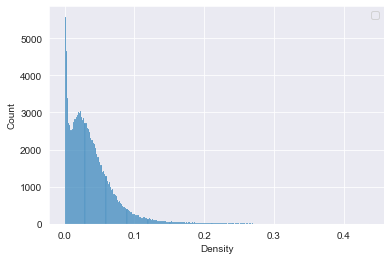

In [1319]:
sns.histplot(den_all["Density"])
plt.legend()

In [1320]:
den_all["Density ineffective"] = np.where(den_all["Density ineffective"]>=0,den_all["Density ineffective"],0)

No handles with labels found to put in legend.


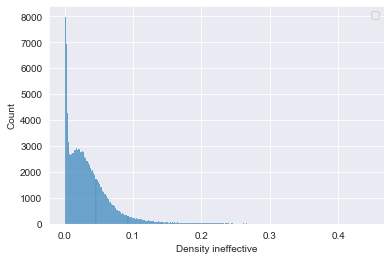

In [1321]:
sns.histplot(den_all["Density ineffective"][den_all["Density ineffective"]>=0])
plt.legend()

No handles with labels found to put in legend.


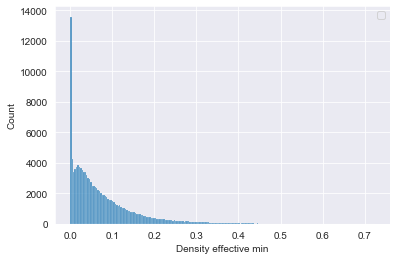

In [1322]:
sns.histplot(den_all["Density effective min"])
plt.legend()

No handles with labels found to put in legend.


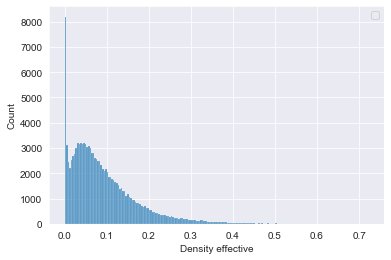

In [1323]:
sns.histplot(den_all["Density effective"])
plt.legend()

<AxesSubplot:xlabel='Density negative', ylabel='Density positive'>

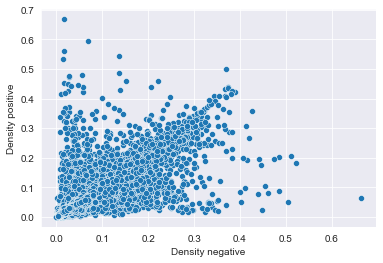

In [1324]:
sns.scatterplot(x="Density negative",y="Density positive",data=den_all)

<AxesSubplot:xlabel='Density diff', ylabel='Density'>

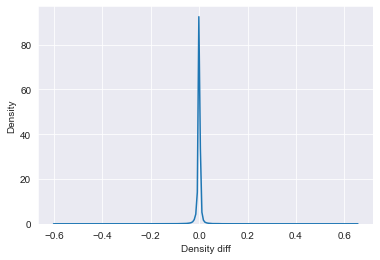

In [1325]:
den_all["Density diff"] = den_all["Density positive"] - den_all["Density negative"]
sns.kdeplot(den_all["Density diff"])

In [1326]:
den_all["Density diff"].mean()

-0.0005435760194352293

In [1327]:
den_all["Density diff"].std()

0.015913127405271014

In [1328]:
den_all["type"] = np.where(
    (den_all["Density positive"] - den_all["Density negative"]) > (den_all["Density positive"] - den_all["Density negative"]).quantile(0.975)|
    (den_all["Density positive"] - den_all["Density negative"]) < (den_all["Density positive"] - den_all["Density negative"]).quantile(0.025),6, 0)

TypeError: Cannot perform 'ror_' with a dtyped [float64] array and scalar of type [bool]

In [ ]:
den_eff = den_all[den_all["type"] == 0][["Density ineffective","Density effective min","Density effective max","Density effective"]] + 1e-8

In [ ]:
alpha = 0
beta = 0
#sigma = 0.75

In [ ]:
from pomegranate import *

np.random.seed(0)
model = GeneralMixtureModel.from_samples([GammaDistribution], 2, den_eff[["Density ineffective"]])
model

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "IndependentComponentsDistribution",
            "parameters" : [
                [
                    {
                        "class" : "Distribution",
                        "name" : "GammaDistribution",
                        "parameters" : [
                            0.6877488641460862,
                            21.215289590902376
                        ],
                        "frozen" : false
                    }
                ],
                [
                    1.0
                ]
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "IndependentComponentsDistribution",
            "parameters" : [
                [
                    {
                        "class" : "Distribution",
                        "name" : "GammaDistribution",
                   

/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

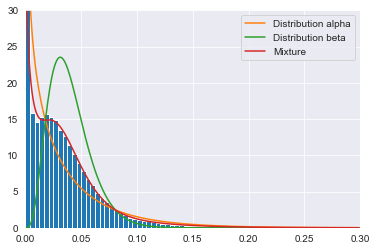

In [ ]:
plt.hist(den_eff[["Density ineffective"]], bins=100, density=True, stacked=True)
x = np.arange(0,0.3,0.001)
sns.lineplot(x, model.distributions[0].probability(x[:,None]), label="Distribution alpha")
sns.lineplot(x, model.distributions[1].probability(x[:,None]), label="Distribution beta")
sns.lineplot(x, model.probability(x[:,None]), label="Mixture")
# sns.lineplot(den_eff, model3.distributions[0].probability(den_eff), label="Distribution 1")
# sns.lineplot(den_eff, model3.distributions[1].probability(den_eff), label="Distribution 2")
# sns.lineplot(den_eff, model3.probability(den_eff), label="Mixture")
plt.legend()
plt.ylim((0,30))
plt.xlim((0,0.3))
plt.show()

In [ ]:
np.random.seed(0)
model3 = GeneralMixtureModel.from_samples([GammaDistribution], 2, den_eff[["Density effective"]])
model3

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "IndependentComponentsDistribution",
            "parameters" : [
                [
                    {
                        "class" : "Distribution",
                        "name" : "GammaDistribution",
                        "parameters" : [
                            0.4208401447589777,
                            8.656392389058984
                        ],
                        "frozen" : false
                    }
                ],
                [
                    1.0
                ]
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "IndependentComponentsDistribution",
            "parameters" : [
                [
                    {
                        "class" : "Distribution",
                        "name" : "GammaDistribution",
                    

/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

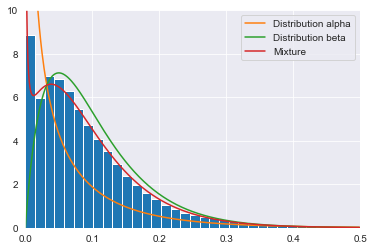

In [ ]:
plt.hist(den_eff[["Density effective"]], bins=50, density=True, stacked=True)
x = np.arange(0,0.5,0.001)
sns.lineplot(x, model3.distributions[0].probability(x[:,None]), label="Distribution alpha")
sns.lineplot(x, model3.distributions[1].probability(x[:,None]), label="Distribution beta")
sns.lineplot(x, model3.probability(x[:,None]), label="Mixture")
# sns.lineplot(den_eff, model3.distributions[0].probability(den_eff), label="Distribution 1")
# sns.lineplot(den_eff, model3.distributions[1].probability(den_eff), label="Distribution 2")
# sns.lineplot(den_eff, model3.probability(den_eff), label="Mixture")
plt.legend()
plt.ylim((0,10))
plt.xlim((0,0.5))
plt.show()

In [ ]:
labels1 = (model.predict_proba(den_all[["Density ineffective"]])[:,0]<0.5-alpha)
labels2 = (model3.predict_proba(den_all[["Density effective min"]])[:,0]<0.5-beta)
labels3 = (model3.predict_proba(den_all[["Density effective max"]])[:,0]<0.5-beta)

In [ ]:
den_all["type"] = np.where((labels1==0)&(labels2==1)&(den_all["type"]==0), 1, den_all["type"])
den_all["type"] = np.where((labels1==1)&(labels2==1)&(den_all["type"]==0), 2, den_all["type"])
den_all["type"] = np.where((labels1==0)&(labels2==0)&(labels3==0)&(den_all["type"]==0), 3, den_all["type"])
den_all["type"] = np.where((labels1==0)&(labels2==0)&(labels3==1)&(den_all["type"]==0), 4, den_all["type"])
den_all["type"] = np.where((labels1==1)&(labels2==0)&(den_all["type"]==0), 5, den_all["type"])

In [ ]:
#sns.histplot(den_all["Density effective max"][den_all["type"]==3]-den_all["Density effective min"][den_all["type"]==3])

In [ ]:
# (den_all["Density effective max"][den_all["type"]==3]-den_all["Density effective min"]
# [den_all["type"]==3])[(den_all["Density effective max"][den_all["type"]==3]-den_all["Density effective min"][den_all["type"]==3])>0].quantile(sigma)

In [ ]:
# den_all["type"] = np.where(((den_all["Density effective max"]-den_all["Density effective min"])
# >((den_all["Density effective max"][den_all["type"]==3]-den_all["Density effective min"]
# [den_all["type"]==3])[(den_all["Density effective max"][den_all["type"]==3]-den_all["Density effective min"][den_all["type"]==3])>0].quantile(sigma)))&(den_all["type"]==3), 4, den_all["type"])

In [ ]:
# (den_all["Density effective max"][den_all["type"]==5]-den_all["Density effective min"]
# [den_all["type"]==5])[(den_all["Density effective max"][den_all["type"]==5]-den_all["Density effective min"][den_all["type"]==5])>0].quantile(sigma)

In [ ]:
# den_all["type"] = np.where(((den_all["Density effective max"]-den_all["Density effective min"])
# >((den_all["Density effective max"][den_all["type"]==5]-den_all["Density effective min"]
# [den_all["type"]==5])[(den_all["Density effective max"][den_all["type"]==5]-den_all["Density effective min"][den_all["type"]==5])>0].quantile(sigma)))&(den_all["type"]==5), 6, den_all["type"])

In [ ]:
den_test = den_test.merge(den_all[["type"]],left_index=True,right_index=True,how="left")

In [ ]:
den_test["type"] = np.where(den_test["type"]==1, "sub-scene 1", den_test["type"])
den_test["type"] = np.where(den_test["type"]=="2", "sub-scene 2", den_test["type"])
den_test["type"] = np.where(den_test["type"]=="3", "sub-scene 3", den_test["type"])
den_test["type"] = np.where(den_test["type"]=="4", "sub-scene 4", den_test["type"])
den_test["type"] = np.where(den_test["type"]=="5", "sub-scene 5", den_test["type"])
den_test["type"] = np.where(den_test["type"]=="6", "sub-scene 6", den_test["type"])

In [ ]:
color = {"sub-scene 1":"orange","sub-scene 2":"red","sub-scene 3":"c","sub-scene 4":'#1f77b4',"sub-scene 5":"m","sub-scene 6":"purple","sub-scene 7":"black"}

/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


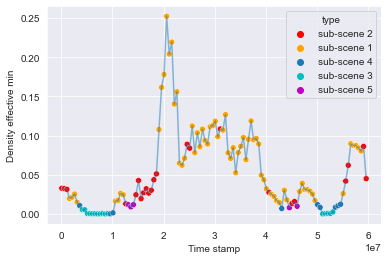

In [ ]:
subset = den_test[den_test["File name"] == "17-04-12_19-21-02_427500000_487500000"]
sns.scatterplot("Time stamp","Density effective min", hue = "type", data = subset, palette=color)
plt.plot("Time stamp","Density effective min", data = subset, alpha = 0.5)

/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time stamp', ylabel='Density effective min'>

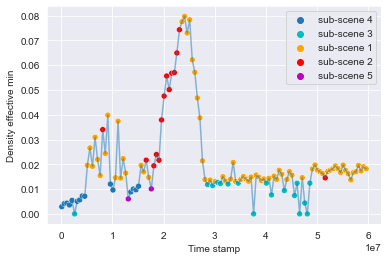

In [ ]:
subset = den_test[den_test["File name"] == "17-04-13_15-05-43_1403500000_1463500000"]
sns.scatterplot("Time stamp","Density effective min", hue = "type", data = subset, palette=color)
sns.lineplot("Time stamp","Density effective min", data = subset, alpha = 0.5)

In [ ]:
subset[subset["type"]=="sub-scene 7"]["Time stamp"]

Series([], Name: Time stamp, dtype: int64)

/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time stamp', ylabel='Density effective min'>

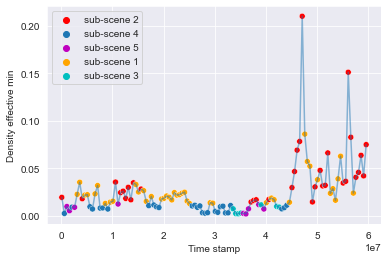

In [ ]:
subset = den_test[den_test["File name"] == "17-04-13_15-05-43_3599500000_3659500000"]
sns.scatterplot("Time stamp","Density effective min", hue = "type", data = subset, palette=color)
sns.lineplot("Time stamp","Density effective min", data = subset, alpha = 0.5)

In [ ]:
subset[subset["Time stamp"]==599999]["type"],subset[subset["Time stamp"]==5599999]["type"],subset[subset["Time stamp"]==10599999]["type"],subset[subset["Time stamp"]==22599999]["type"],subset[subset["Time stamp"]==30099999]["type"],subset[subset["Time stamp"]==34099999]["type"],subset[subset["Time stamp"]==49099999]["type"]

(17-04-13_15-05-43_3599500000_3659500000599999    sub-scene 4
 Name: type, dtype: object,
 17-04-13_15-05-43_3599500000_36595000005599999    sub-scene 4
 Name: type, dtype: object,
 17-04-13_15-05-43_3599500000_365950000010599999    sub-scene 2
 Name: type, dtype: object,
 17-04-13_15-05-43_3599500000_365950000022599999    sub-scene 1
 Name: type, dtype: object,
 17-04-13_15-05-43_3599500000_365950000030099999    sub-scene 4
 Name: type, dtype: object,
 17-04-13_15-05-43_3599500000_365950000034099999    sub-scene 3
 Name: type, dtype: object,
 17-04-13_15-05-43_3599500000_365950000049099999    sub-scene 2
 Name: type, dtype: object)

([<matplotlib.patches.Wedge at 0x7faed2845910>,
 [Text(0.5785585483870036, 0.9355586598863395, 'sub-scene 2'),
  Text(-1.0472557966916265, -0.3365342423822379, 'sub-scene 1'),
  Text(0.5156930276592422, -0.971627861490007, 'sub-scene 3'),
  Text(0.9918064486602485, -0.4757309832205026, 'sub-scene 4'),
  Text(1.0935803517027725, -0.11866766353830716, 'sub-scene 6'),
  Text(1.099219527478581, -0.041429825123520524, 'sub-scene 5')])

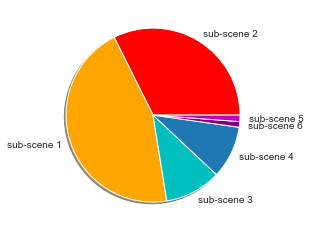

In [ ]:
typs = den_test["type"].unique()
plt.pie([(den_test["type"]==typ).sum() for typ in typs],labels=typs,colors=[color[typ] for typ in typs],shadow=True)

In [ ]:
den_all[den_all["type"]=="sub-scene 6"]["File name"].unique()

array([], dtype=object)

In [ ]:
test_result = test_result.merge(den_test["type"],right_index=True,left_index=True)

<AxesSubplot:xlabel='type', ylabel='Map'>

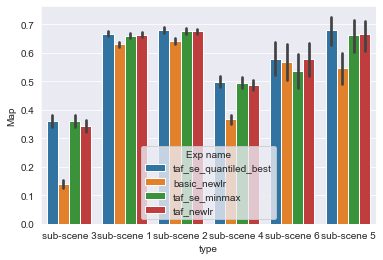

In [ ]:
sns.barplot(x="type",y="Map",hue="Exp name",data=test_result)

<AxesSubplot:xlabel='Map', ylabel='Density'>

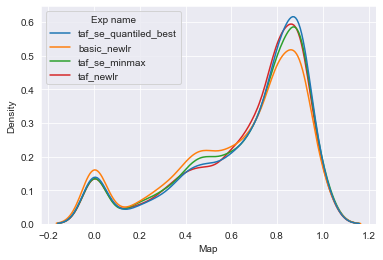

In [ ]:
subset = test_result[test_result["type"]=="sub-scene 1"]
sns.kdeplot(subset["Map"],hue=subset["Exp name"])

<AxesSubplot:xlabel='Map', ylabel='Density'>

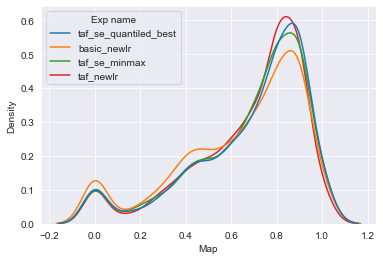

In [ ]:
subset = test_result[test_result["type"]=="sub-scene 2"]
sns.kdeplot(subset["Map"],hue=subset["Exp name"])

<AxesSubplot:xlabel='Map', ylabel='Density'>

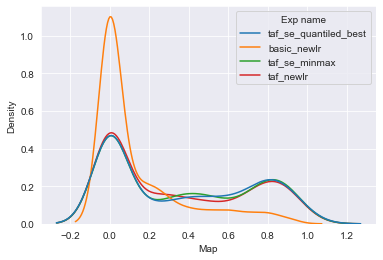

In [ ]:
subset = test_result[test_result["type"]=="sub-scene 3"]
sns.kdeplot(subset["Map"],hue=subset["Exp name"])

<AxesSubplot:xlabel='Map', ylabel='Density'>

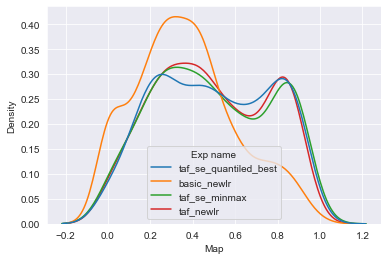

In [ ]:
subset = test_result[test_result["type"]=="sub-scene 4"]
sns.kdeplot(subset["Map"],hue=subset["Exp name"])

<AxesSubplot:xlabel='Map', ylabel='Density'>

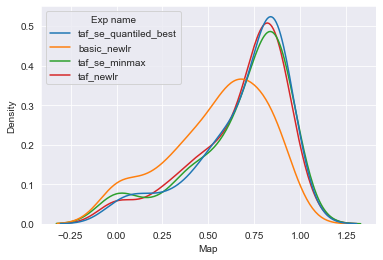

In [ ]:
subset = test_result[test_result["type"]=="sub-scene 5"]
sns.kdeplot(subset["Map"],hue=subset["Exp name"])

<AxesSubplot:xlabel='Map', ylabel='Density'>

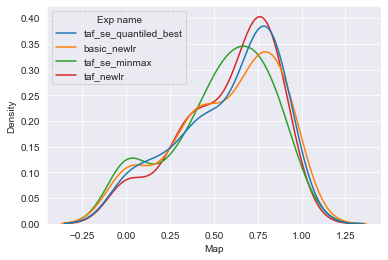

In [ ]:
subset = test_result[test_result["type"]=="sub-scene 6"]
sns.kdeplot(subset["Map"],hue=subset["Exp name"])

In [ ]:
test_result[(test_result["File name_x"]=="17-08-23_17-50-46_1403500000_1463500000")&(test_result["Time stamp_x"]>26850000)&(test_result["Time stamp_x"]<27150000)]

,Exp name,File name_x,Time stamp_x,Map,Map 50,Map 75,Map small,Map medium,Map large,Infer time,...,Time stamp,Density,Density negative,Density positive,Density effective,Density ineffective,Density effective max,Density effective min,Run time,type


In [ ]:
test_result[(test_result["type"]=="sub-scene 7")&(test_result["Map"])]

,Exp name,File name_x,Time stamp_x,Map,Map 50,Map 75,Map small,Map medium,Map large,Infer time,...,Time stamp,Density,Density negative,Density positive,Density effective,Density ineffective,Density effective max,Density effective min,Run time,type


In [ ]:
pivot = pd.pivot_table(test_result[(test_result["type"]=="sub-scene 7")], index= test_result[(test_result["type"]=="sub-scene 7")].index, columns=["Exp name"], values=["Map"])
pivot[(pivot[("Map","basic_newlr")]==0)&(pivot[("Map","taf_newlr")]>0.5)]

KeyError: ('Map', 'basic_newlr')

In [ ]:
pd.pivot_table(test_result[(test_result["File name"]=="17-08-23_17-50-46_1403500000_1463500000")], index= test_result[(test_result["type"]=="sub-scene 7")&(test_result["File name"]=="17-08-23_17-50-46_1403500000_1463500000")].index, columns=["Exp name"], values=["Map"])

ValueError: Grouper and axis must be same length

In [ ]:
scene1 = {#"density":0.01766173245614035,
"density positive":0.01775767543859649,
"density negative":0.01756578947368421,
#"density eff":0.09327239488117002,
"density ineffective":0.008081229248706663,
"density effective max":0.16796934865900384,
"density effective min":0.07914492753623188}

scene2 = {#"density":0.08120065789473684,
"density positive":0.08118969298245614,
"density negative": 0.08121162280701755,
#"density_eff": 0.23321995464852607,
"density ineffective": 0.07934043674907738,
"density effective max": 0.2544642857142857,
"density effective min": 0.21129032258064517}

scene3 = {
#"density": 0.003958333333333334,
"density positive": 0.003991228070175439,
"density negative": 0.003925438596491228,
#"density_eff": 0.002567829457364341,
"density ineffective": 0.004187420178799489,
"density effective max": 0.002567829457364341,
"density effective min": 0.002567829457364341}

scene4 = {
#"density": 0.014791666666666667,
"density positive": 0.014624451754385965,
"density negative": 0.014958881578947368,
#"density_eff": 0.07751595483554247,
"density ineffective": 0.011082077635513747,
"density effective max": 0.14625199362041466,
"density effective min": 0.01855905152758778
}

scene5 = {
    #"density": 0.06781387061403508,
"density positive": 0.06885142543859649,
"density negative": 0.06677631578947368,
#"density_eff": 0.013111413043478262,
"density ineffective": 0.06894024171888988,
"density effective max": 0.013111413043478262,
"density effective min": 0.013111413043478262
}

scene6 = {
    #"density": 0.05097176535087719,
"density positive": 0.051282894736842104,
"density negative": 0.05066063596491228,
#"density_eff": 0.12262607905497501,
"density ineffective": 0.04874291609547902,
"density effective max": 0.20674897119341565,
"density effective min": 0.01896551724137931
}

scene7 = {
    #"density": 0.19675164473684212,
"density positive": 0.2042982456140351,
"density negative": 0.18920504385964912,
#"density_eff": 0.1826086956521739,
"density ineffective": 0.19689122039669468,
"density effective max": 0.1826086956521739,
"density effective min": 0.1826086956521739
}

<AxesSubplot:>

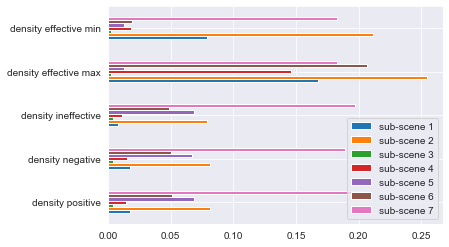

In [ ]:
pd.DataFrame({"sub-scene 1":scene1, "sub-scene 2":scene2, "sub-scene 3":scene3, "sub-scene 4":scene4, "sub-scene 5":scene5, "sub-scene 6":scene6, "sub-scene 7":scene7}).plot.barh()